# RESERVOIR ENGINEERING ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [ ]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 951, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 951 (delta 16), reused 28 (delta 10), pack-reused 915 (from 1)
Receiving objects: 100% (951/951), 24.45 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (505/505), done.


## 4a Mapping oil in place - Part 1

$$N=\frac{h \cdot \phi \cdot (1-S_w)}{Bo}$$

N = STB/ft (OOIP per unit area)

In [ ]:
import sys
sys.path.append('/content/pyreservoir/volumetrics')

from volumetrics import *

In [ ]:
df = pd.read_csv('/content/pyreservoir/data/volumetric_data.csv')

df

,well_id,x,y,depth,h,poro,sw
0,1,0.0,-110.0,-4900,25,0.200,0.50
1,2,4500.0,4970.0,-4920,33,0.205,0.65
2,3,2640.0,2640.0,-4800,44,0.200,0.20
3,4,660.0,2100.0,-4900,36,0.190,0.22
4,5,2000.0,770.0,-4850,22,0.023,0.27
5,6,2640.0,4500.0,-4850,45,0.242,0.23
6,7,4000.0,3000.0,-4880,23,0.235,0.22
7,8,660.0,3400.0,-5100,34,0.230,1.00
8,9,5500.0,1320.0,-5050,24,0.190,1.00
9,10,2200.0,6500.0,-5010,11,0.210,1.00


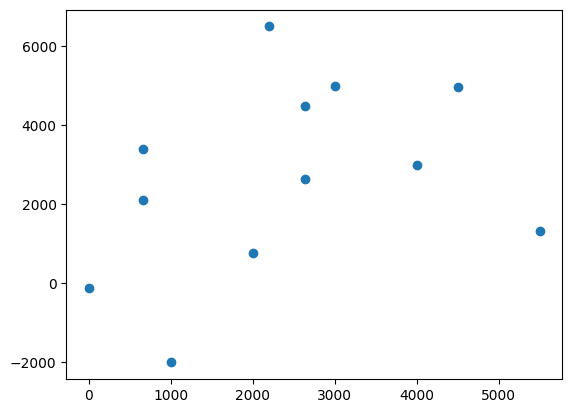

In [ ]:
plt.scatter(df['x'], df['y'])

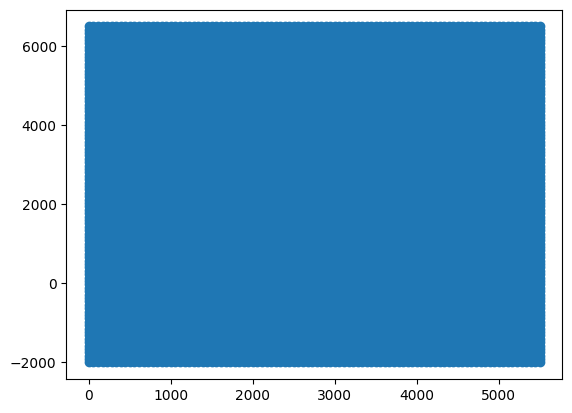

In [ ]:
from scipy.interpolate import griddata

# make list of items
item = ['depth', 'h', 'poro', 'sw']

# Define the extent of plot
x, y = df['x'], df['y']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

# Meshgrid your coordinate
xi, yi = np.meshgrid(xi, yi)

plt.scatter(xi, yi)

Text(0.5, 1.0, 'Porosity map')

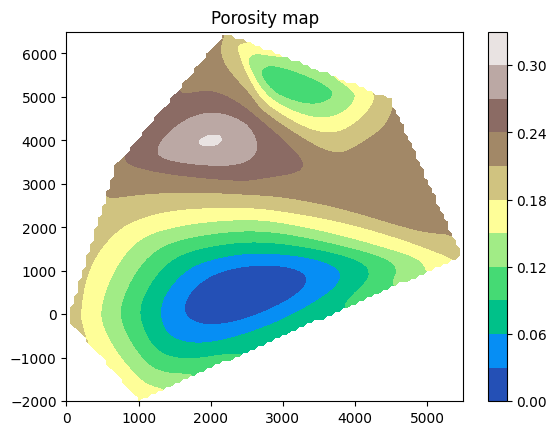

In [ ]:
# define z
z = df.poro

# plot interpolated porosity
zi = griddata((x, y), z, (xi, yi), method='cubic')
plt.contourf(xi, yi, zi, levels=10, cmap='terrain')
plt.colorbar()
plt.title('Porosity map')

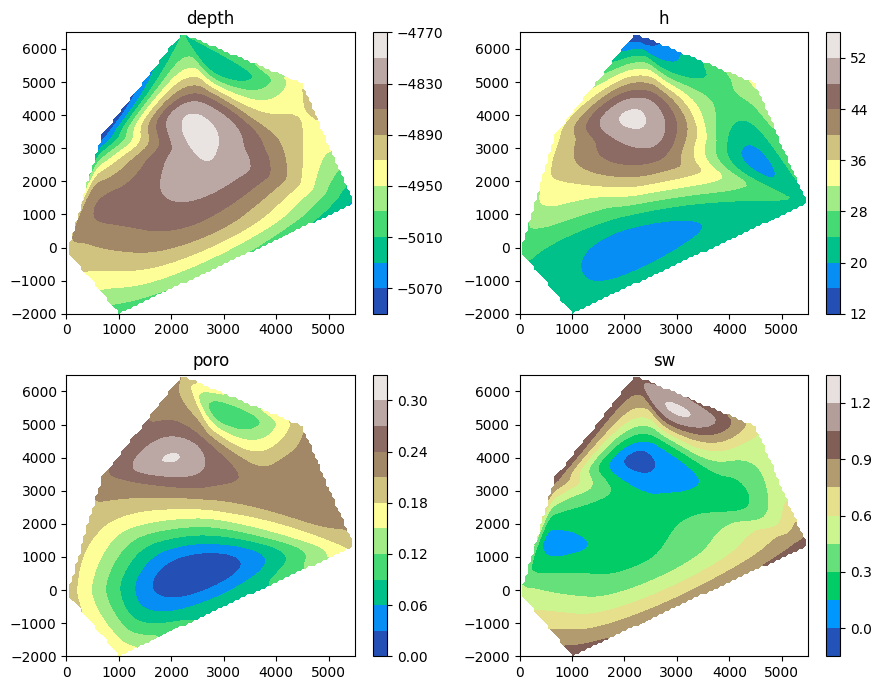

In [ ]:

# make subplot
plt.figure(figsize=(9,7))
for i in range(4):
  plt.subplot(2,2,i+1)

  # Make a countour plot
  z = df[item[i]].values

  # Regrid
  zi = griddata((x, y), z, (xi, yi), method='cubic')

  # Make contour
  plt.contourf(xi, yi, zi, levels=10, cmap='terrain')
  plt.colorbar()
  plt.title(item[i])

plt.tight_layout()

In [ ]:
# Calculate OOIP/area
def ooip_per_area(h, sw, poro, Bo):
  N = (h * poro * (1 - sw)) / Bo
  return N * (1 / 5.61458) # Convert ft3/ft2 to STB/ft2

In [ ]:
Bo = 1.435 # RB/STB

# Apply to data
h, sw, poro = df['h'], df['sw'], df['poro']
N = ooip_per_area(h, sw, poro, Bo)

df['N (STB/ft2)'] = N

df

,well_id,x,y,depth,h,poro,sw,N (STB/ft2)
0,1,0.0,-110.0,-4900,25,0.200,0.50,0.310292
1,2,4500.0,4970.0,-4920,33,0.205,0.65,0.293878
2,3,2640.0,2640.0,-4800,44,0.200,0.20,0.873783
3,4,660.0,2100.0,-4900,36,0.190,0.22,0.662188
4,5,2000.0,770.0,-4850,22,0.023,0.27,0.045846
5,6,2640.0,4500.0,-4850,45,0.242,0.23,1.040757
6,7,4000.0,3000.0,-4880,23,0.235,0.22,0.523264
7,8,660.0,3400.0,-5100,34,0.230,1.00,0.000000
8,9,5500.0,1320.0,-5050,24,0.190,1.00,0.000000
9,10,2200.0,6500.0,-5010,11,0.210,1.00,0.000000


## 4b Mapping oil in place - Part 2

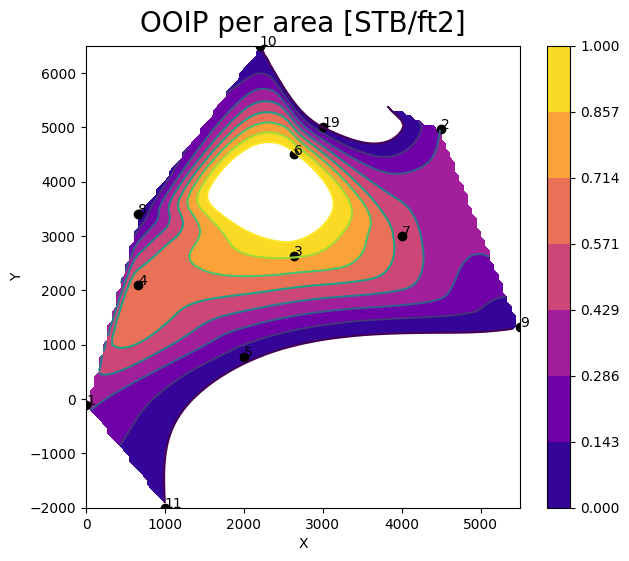

In [ ]:
# Contour OOIP/ft2

# Regrid
Ni = griddata((x,y), N, (xi,yi), method='cubic')
# plt.imshow(Ni)

plt.figure(figsize=(7,6))

levels = np.linspace(0, 1, 8)

cnt = plt.contour(xi, yi, Ni, levels=levels) # Record the contours
plt.contourf(xi, yi, Ni, levels=levels, cmap='plasma')
plt.colorbar()

# Add well ID
x, y = df['x'], df['y']
id = df['well_id']

for i in range(len(x)):
  plt.scatter(x[i], y[i], c='k')
  plt.text(x[i], y[i], id[i], size=10)

plt.title('OOIP per area [STB/ft2]', size=20, pad=10)
plt.xlabel('X'); plt.ylabel('Y')

plt.show()

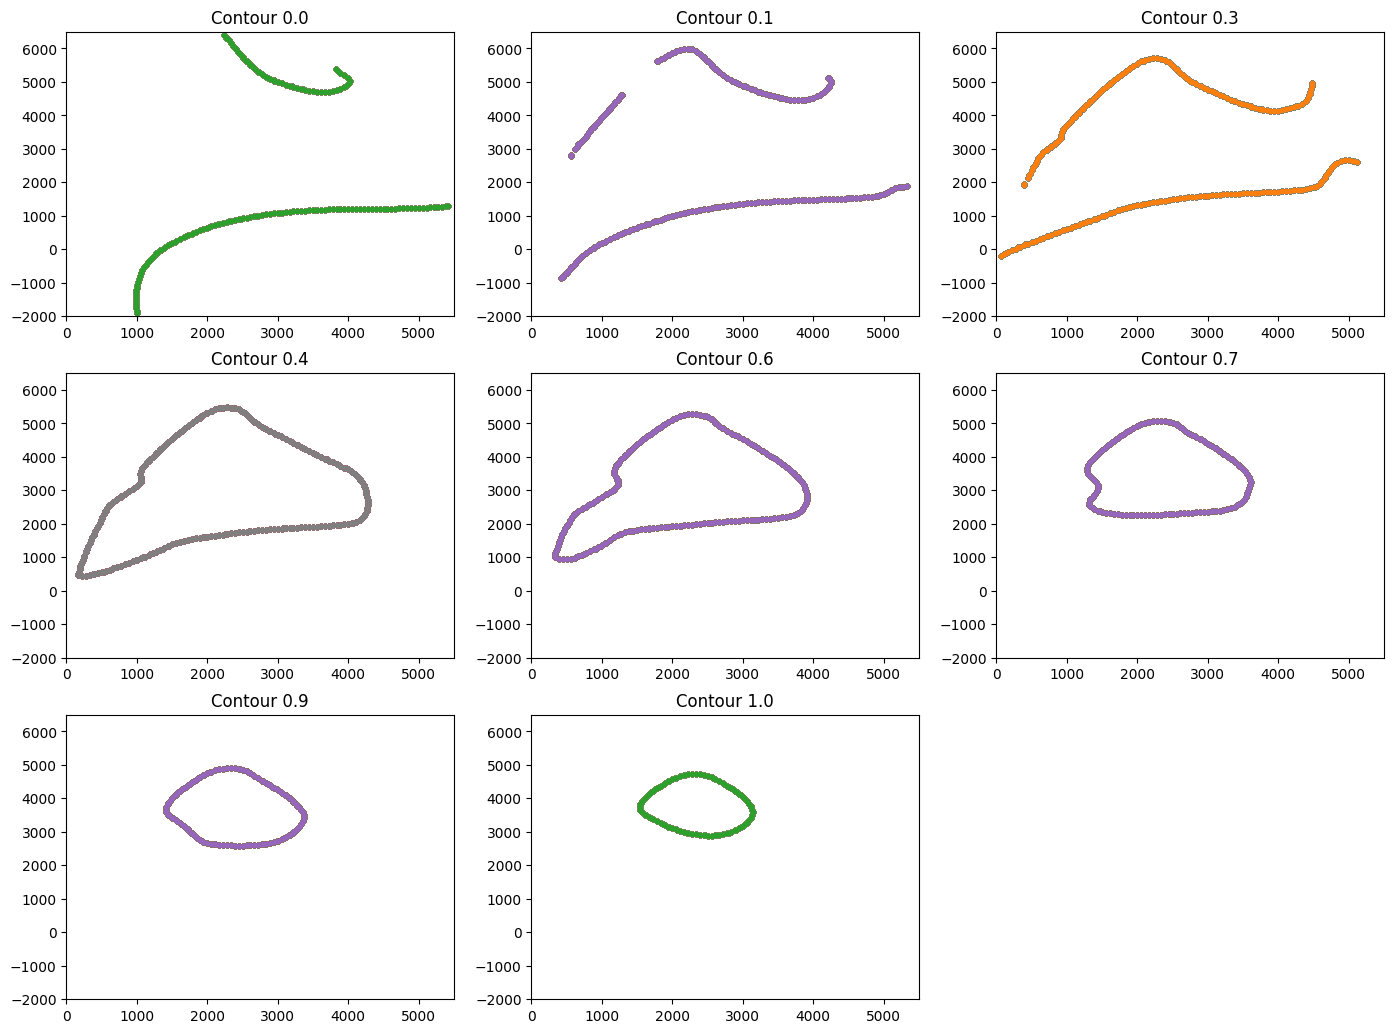

In [ ]:
# Get all contours from the contour map
cnts = get_contours(cnt, xi, yi)

In [ ]:
# Calculate the area of contours
A = compute_area(cnts)

pd.DataFrame({'N [OIP/ft2]': levels, 'A [ft2]': A})

,N [OIP/ft2],A [ft2]
0,0.000000,1.761776e+07
1,0.142857,6.755959e+06
2,0.285714,7.956753e+06
3,0.428571,1.046502e+07
4,0.571429,7.758739e+06
5,0.714286,4.817236e+06
6,0.857143,3.187186e+06
7,1.000000,2.070218e+06


Methods to calculate OIP:
* Trapezoid
* Pyramidal
* 1/3 Simpson

In [ ]:
# Calculate OIP final
oip_trapz = trapezoid(A, 0.1)
oip_pyra = pyramidal(A, 0.1)
oip_simp = simpson(A, 0.1)

print(f'Trapezoid: {oip_trapz*1e-6} MMSTB, Pyramidal: {oip_pyra*1e-6} MMSTB, Simpson: {oip_simp*1e-6} MMSTB')

Trapezoid: 5.07848812230792 MMSTB, Pyramidal: 5.018266049073676 MMSTB, Simpson: 4.854872995924448 MMSTB


## 4c PVT correlation

In [ ]:
sys.path.append('/content/pyreservoir/pvt')
from pvtcorrelation import *

In [ ]:
# Gas, field unit
pressure = 2010 # psi
temp = 110 # F
sg = 0.6
x_h2s = 0.07 # mole fraction of H2S
x_co2 = 0.1 # mole fraction of CO2

# Calculate PVT properties
# Pseudoproperties
P_pc, T_pc, P_pr, T_pr = gas_pseudoprops(temp, pressure, sg, x_h2s, x_co2)

# Z-factor
rho_pr, z_factor = gas_zfactor(T_pr, P_pr)

# density (lb/ft3)
rhogas = gas_density(temp, pressure, sg, z_factor)

# gas FVF (res ft3/scf)
Bg = gas_fvf(z_factor, temp, pressure)

# gas compressibility (sip)
cgas = gas_compressibility(T_pr, P_pr, rho_pr, z_factor, P_pc)

# viscosity (cp)
viscogas = gas_mu(temp, rho, sg)

print('=== Gas PVT Correlation Calculator === \n')
print('Your Input:')
print('Pressure                   : {} psia'.format(pressure))
print('Temperature                : {} °F'.format(temp))
print('Specific Gravity           : {}'.format(sg))
print('H2S Mole Fraction          : {}'.format(x_h2s))
print('CO2 Mole Fraction          : {} \n'.format(x_co2))

print('PVT Output:')
print('z-factor                   : {}'.format(z_factor))
print('Density                    : {} lb/ft3'.format(rhogas))
print('FVF                        : {} res ft3/scf'.format(Bg))
print('Isothermal compressibility : {} microsip'.format(cgas * 1E+6))
print('Viscosity                  : {} cp'.format(viscogas))

=== Gas PVT Correlation Calculator === 

Your Input:
Pressure                   : 2010 psia
Temperature                : 110 °F
Specific Gravity           : 0.6
H2S Mole Fraction          : 0.07
CO2 Mole Fraction          : 0.1 

PVT Output:
z-factor                   : 0.8730400266364673
Density                    : 6.545723170852101 lb/ft3
FVF                        : 0.006997293688222008 res ft3/scf
Isothermal compressibility : 489.74690309997175 microsip
Viscosity                  : 0.015220518791592856 cp


1 microsip = 10^-6 sip

1 sip = 1 / psi

In [ ]:
# Oil
pressure = 1900
temp = 220
sg = 0.8
Rsb = 500 # solution gas oil ratio, scf/STB
api = 30 # oil gravity

# bubblepoint pressure (psi)
pbubble = oil_pbubble(Rsb, sg, api, temp)

# compressibility (sip)
coil = oil_compressibility(pressure, pb, temp, api, Rsb, sg)

# FVF (RB/STB)
Bo = oil_fvf(pb, api, Rsb, sg, temp, pressure)

# Gas oil ratio (scf/STB)
Rs = gasoilratio(pressure, pb, sg, api, temp, Rsb)

# Viscosity (cp)
viscooil = oil_mu(pressure, pb, sg, api, temp, Rs)

In [ ]:
print('=== Oil PVT Correlation Calculator === \n')
print('Your Input:')
print('Pressure                     : {} psia'.format(pressure))
print('Temperature                  : {} °F'.format(temp))
print('Specific Gravity             : {}'.format(sg))
print('Gas-oil ratio @ Bubble-point : {} scf/STB'.format(Rsb))
print('Oil gravity                  : {} API \n'.format(api))

print('PVT Output:')
print('Bubble-point Pressure        : {} psi'.format(pbubble))
print('Gas-oil ratio                : {} scf/STB'.format(Rs))
print('FVF                          : {} RB/STB'.format(Bo))
print('Isothermal compressibility   : {} microsip'.format(coil * 1E+6))
print('Viscosity                    : {} cp'.format(viscooil))


=== Oil PVT Correlation Calculator === 

Your Input:
Pressure                     : 1900 psia
Temperature                  : 220 °F
Specific Gravity             : 0.8
Gas-oil ratio @ Bubble-point : 500 scf/STB
Oil gravity                  : 30 API 

PVT Output:
Bubble-point Pressure        : 2650.3067919543523 psi
Gas-oil ratio                : 347.44320213156914 scf/STB
FVF                          : 1.2298060072933186 RB/STB
Isothermal compressibility   : 33.100146317783555 microsip
Viscosity                    : 0.7777699805921316 cp


## 4d Material balance - Part 1

In [ ]:

# import system and define path
import sys
sys.path.append('/content/pyreservoir/matbal')

In [ ]:

from mbal import drygas, gascondensate, oil

### Dry gas MBAL

In [ ]:

# load production data
df = pd.read_csv('/content/pyreservoir/data/dry_gas_with_waterdrive.csv')

df.head(10)

,t,p,Gp,Np,total_Gp,Wp,Bg,Bw,z
0,0.0,8490.0,0.0,0.0,0.00,0,0.5404,1.0518,1.271392
1,0.5,8330.0,1758.0,2000.0,1759.42,0,0.5458,1.0520,1.259897
2,1.0,8323.0,5852.0,30000.0,5873.24,1000,0.5460,1.0520,1.259299
3,1.5,8166.0,10410.0,66000.0,10456.73,3000,0.5516,1.0522,1.248217
4,2.0,8100.0,14828.0,98000.0,14897.38,4000,0.5540,1.0522,1.243516
5,2.5,7905.0,21097.0,138000.0,21194.70,7000,0.5614,1.0524,1.229789
6,3.0,7854.0,26399.0,180000.0,26526.44,9000,0.5634,1.0525,1.226208
7,3.5,7858.0,30042.0,215000.0,30194.22,10000,0.5632,1.0525,1.226397
8,4.0,7900.0,32766.0,237000.0,32933.80,11000,0.5616,1.0524,1.229449
9,4.5,7971.0,34548.0,257000.0,34729.96,11000,0.5588,1.0524,1.234314


In [ ]:
# Define variables for to visualize
t = df['t'].values
Gp = df['Gp'].values
Np = df['Np'].values
p = df['p'].values

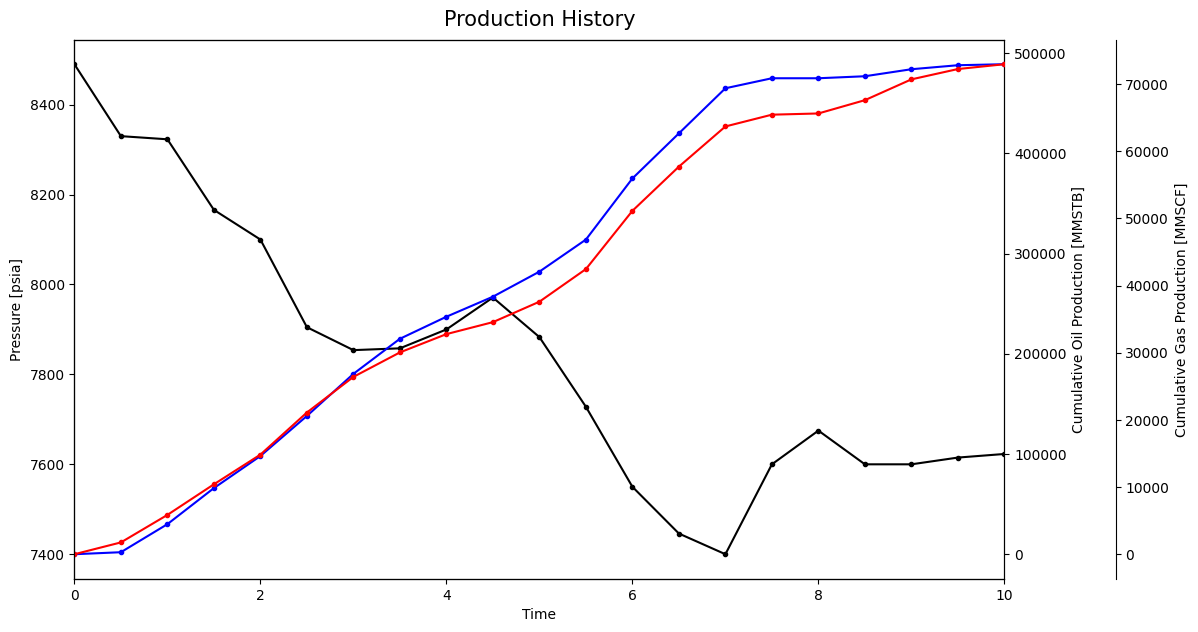

In [ ]:
# Plot pressure and cum production in one plot: use .twinx()
fig = plt.figure(figsize=(12,7))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.plot(t, p, '.-', color='black')
par1.plot(t, Np, '.-', color='blue')
par2.plot(t, Gp, '.-', color='red')

host.set_title('Production History', size=15, pad=10)
host.set_xlim(0, max(t))
host.set_xlabel('Time')
host.set_ylabel('Pressure [psia]')
par1.set_ylabel('Cumulative Oil Production [MMSTB]')
par2.set_ylabel('Cumulative Gas Production [MMSCF]')

par2.spines['right'].set_position(('outward', 80))

plt.show()

Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation compressibility 3.5 microsip
* Water compressibility 2.9 microsip
* Initial water saturation 0.21

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [MMSCF]
* Gas FVF [RB / MSCF]

/content/pyreservoir/matbal/mbal.py:143: RuntimeWarning: invalid value encountered in divide
  x3, y3 = Gp, (F / Eg)


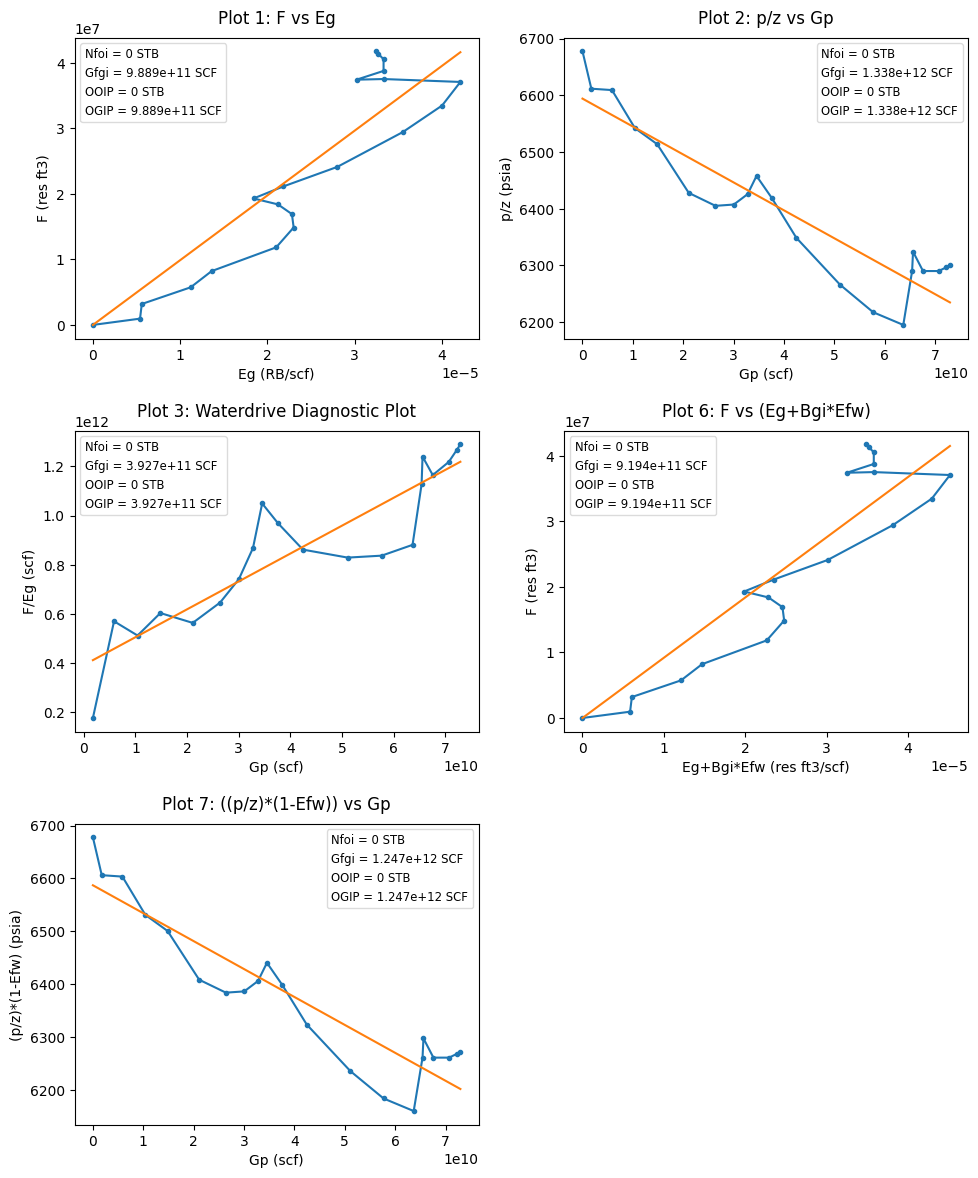

(array([       0.        ,   959516.4       ,  3195192.        ,
         5742156.        ,  8214712.        , 11843855.8       ,
        14873196.6       , 16919654.4       , 18401385.6       ,
        19305422.4       , 21133098.        , 24126306.4       ,
        29438280.3       , 33487338.8       , 37092435.        ,
        37538338.4       , 37438777.8       , 38778104.1       ,
        40553705.6       , 41392720.60000001, 41781750.4       ]),
 array([0.00e+00, 5.40e-06, 5.60e-06, 1.12e-05, 1.36e-05, 2.10e-05,
        2.30e-05, 2.28e-05, 2.12e-05, 1.84e-05, 2.18e-05, 2.80e-05,
        3.55e-05, 4.00e-05, 4.21e-05, 3.33e-05, 3.02e-05, 3.33e-05,
        3.33e-05, 3.27e-05, 3.24e-05]),
 array([0.        , 0.0008322 , 0.00086861, 0.00168521, 0.00202849,
        0.00304274, 0.00330801, 0.0032872 , 0.00306875, 0.00269946,
        0.00315717, 0.00396336, 0.00488919, 0.00543012, 0.00566938,
        0.00462913, 0.00423903, 0.00462913, 0.00462913, 0.00455111,
        0.0045095 ]))

In [ ]:

# input all the required ones.
# variables need conversion: Bg, Gp

Bg = df['Bg'].values * (1 / 1E+3) # convert to RB/scf
Gp = df['Gp'].values * (1E+6) # convert to scf
cf = 3.5E-6 # sip
cw = 2.9E-6 # sip
swi = 0.21
z = df['z'].values

# calculate parameters for plotting: use function "calculate_params"
x = drygas()
F, Btg, Efw, Eg = x.calculate_params(p, Bg, Gp, cf, cw, swi)

# create MBAL plots and automatically give in place results
plt.figure(figsize=(10,12)) # define the figure size
x.plot(p, z, Gp, F, Btg, Efw, Eg)

### Gas condensate MBAL

In [ ]:
# load production data
df = pd.read_csv('/content/pyreservoir/data/baconlime_gas_condensate.csv')

df.head(10)

,p,Np,Gp,Bg,Bo,Rs,Rv,z
0,3700.0,0.0,0.00,0.87,10.058,11560.7,86.5,0.93177
1,3650.0,28600.0,0.34,0.88,2.417,2378.0,81.5,0.92941
2,3400.0,93000.0,1.20,0.92,2.192,2010.0,70.5,0.91859
3,3100.0,231000.0,3.30,0.99,1.916,1569.0,56.2,0.90791
4,2800.0,270000.0,4.30,1.08,1.736,1272.0,46.5,0.90013
5,2500.0,379000.0,6.60,1.20,1.617,1067.0,39.5,0.89566
6,2200.0,481000.0,9.10,1.35,1.504,873.0,33.8,0.89485
7,1900.0,517200.0,10.50,1.56,1.416,719.0,29.9,0.89795
8,1600.0,549000.0,12.00,1.85,1.326,565.0,27.3,0.90507
9,1300.0,580000.0,12.80,2.28,1.268,461.0,25.5,0.91611


Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation and water are incompressible (0 sip)
* Initial water saturation 0.2
* Dewpoint pressure 3,691 psia
* No gas injection

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [BSCF]
* Gas FVF [RB / MSCF]
* Volatile oil-gas ratio [STB / MMSCF]

/content/pyreservoir/matbal/mbal.py:362: RuntimeWarning: invalid value encountered in divide
  x3, y3 = Gp, (F / Eg)


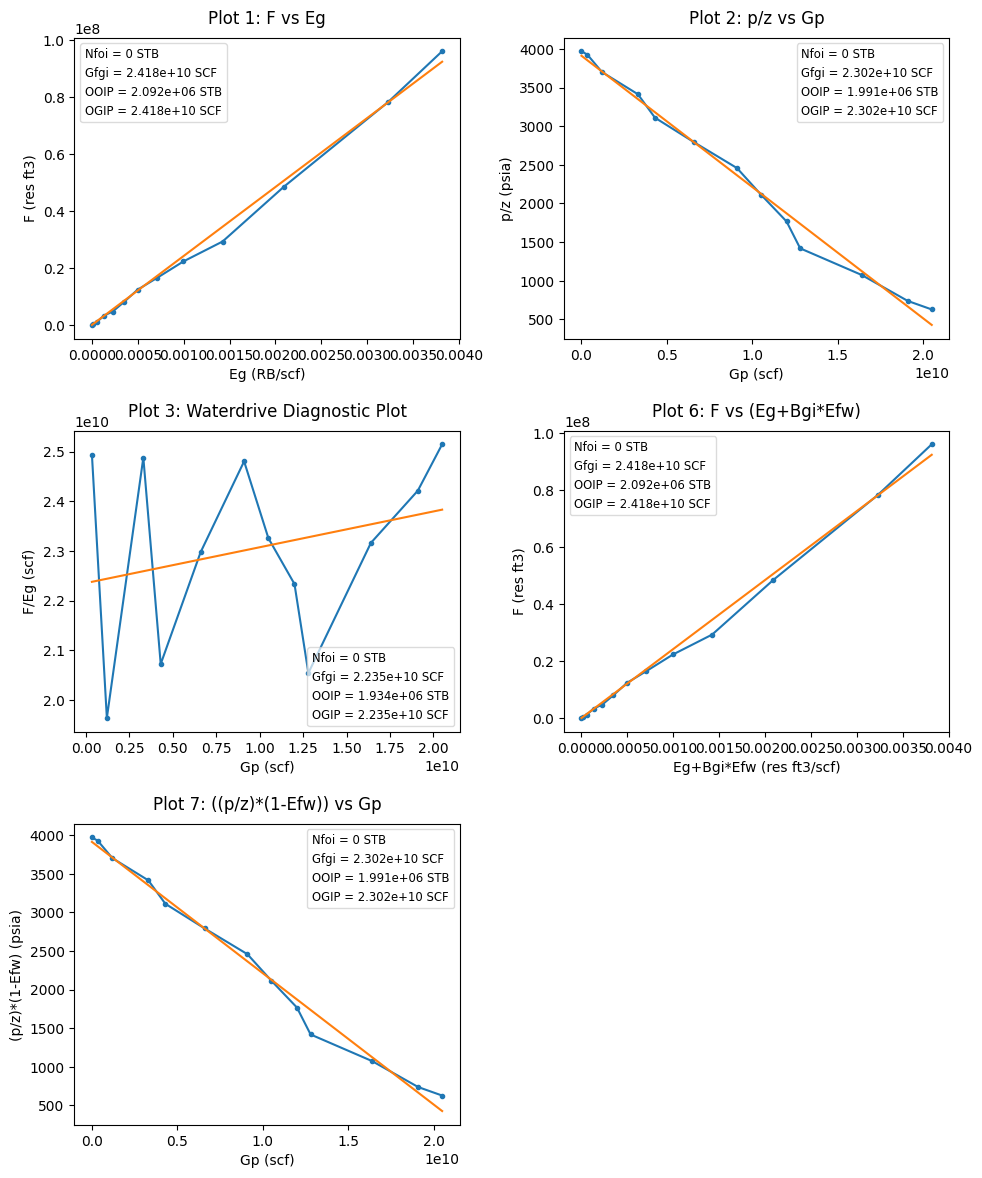

(array([       0.        ,   299558.07852462,  1107354.93041437,
         3285114.17028451,  4670970.14195644,  7961571.88964701,
        12343155.55832162, 16441143.13114773, 22263131.82686345,
        29239665.28526088, 48424305.0861038 , 78147206.39933419,
        95961416.12370604]),
 array([0.00000000e+00, 1.20116771e-05, 5.63903436e-05, 1.32052248e-04,
        2.25400509e-04, 3.46516304e-04, 4.97672690e-04, 7.07026820e-04,
        9.96880778e-04, 1.42338952e-03, 2.09072925e-03, 3.22765428e-03,
        3.81632116e-03]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
# input all the required ones. Gi = 0 (no gas injection)
# variables need conversion: Bg, Gp, Rv.

p = df['p'].values
pdew = 3691 # dewpoint pressure, psia
Bg = df['Bg'].values * (1 / 1E+3) # convert to RB/scf
Bo = df['Bo'].values
Np = df['Np'].values
Gp = df['Gp'].values * 1E+9 # convert to SCF
Gi = np.zeros(len(df)) # no gas injection
cf = 0
cw = 0
swi = 0.1
Rs = df['Rs'].values
Rv = df['Rv'].values * (1 / 1E+6) # convert to STB/SCF
z = df['z'].values

# calculate parameters for plotting: use function "calculate_params"
x = gascondensate()
F, Btg, Efw, Eg = x.calculate_params(p, pdew, Bg, Bo, Np, Gp, Gi, cf, cw, swi, Rs, Rv)

# create MBAL plots and automatically give in place results
plt.figure(figsize=(10,12))
x.plot(p, z, Gp, F, Btg, Efw, Eg, Rv)


## 4e Material balance - Part 2

### Undersaturated oil MBAL

In [ ]:
# load production data
df = pd.read_csv('/content/pyreservoir/data/volve/volve_production.csv')

df.head(10)

,Date,p (psia),Np (STB),Gp (SCF),Wp (STB),Gi (SCF),Wi (STB),Rp (SCF/STB),Bo (RB/STB),Bg (RB/SCF),Rs (SCF/STB),Rv (STB/SCF)
0,2008-01-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0.0
1,2008-02-01,4725.76,308749,250870000,2595.03,0,0,812.537,1.305797,0.000970,627.711085,0.0
2,2008-03-01,4521.70,833031,683581000,2767.48,0,0,820.595,1.309193,0.001003,627.711085,0.0
3,2008-04-01,4297.32,1301790,1091990000,5799.25,0,187124,838.837,1.313071,0.001043,627.711085,0.0
4,2008-05-01,4353.89,2090960,1769630000,108190.00,0,1579180,846.324,1.312078,0.001032,627.711085,0.0
5,2008-06-01,4359.69,2995280,2533180000,111174.00,0,2911280,845.724,1.311977,0.001031,627.711085,0.0
6,2008-07-01,4362.30,4041070,3408290000,113791.00,0,4370580,843.413,1.311931,0.001031,627.711085,0.0
7,2008-08-01,4309.95,5081590,4257410000,117418.00,0,5807020,837.811,1.312849,0.001041,627.711085,0.0
8,2008-09-01,4231.05,6290800,5234430000,120337.00,0,6834680,832.077,1.314241,0.001056,627.711085,0.0
9,2008-10-01,4085.44,7782460,6432630000,124899.00,0,9072140,826.555,1.316864,0.001086,627.711085,0.0


Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation compressibility is 48.4 microsip
* Water compressibility is 46.7 microsip
* Initial water saturation 0.5
* There is gas injection

All variables are already in FIELD UNITS. No need for conversion.

/content/pyreservoir/matbal/mbal.py:570: RuntimeWarning: invalid value encountered in divide
  x2, y2 = Np, F / (Eg + Boi * Efw)


TypeError: tight_layout() takes 0 positional arguments but 1 was given

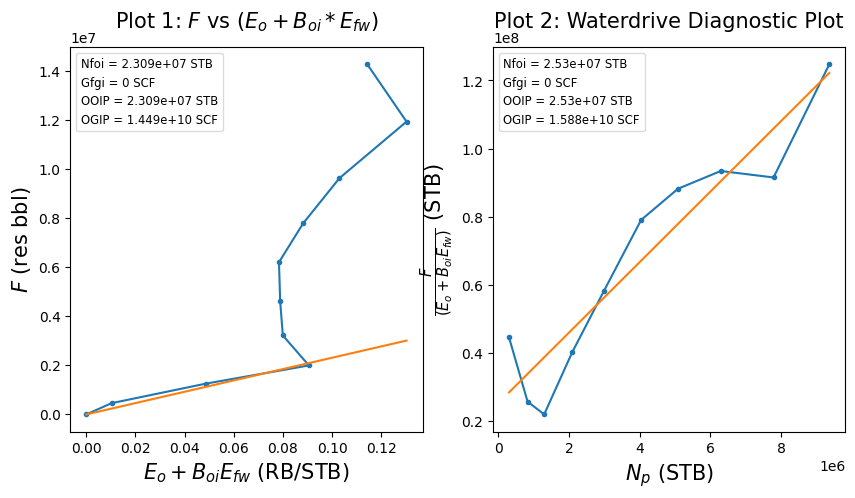

In [ ]:
# input all the required ones
p = df['p (psia)'].values
Bo = df['Bo (RB/STB)'].values
Bg = df['Bg (RB/SCF)'].values
Rv = df['Rv (STB/SCF)'].values
Rs = df['Rs (SCF/STB)'].values
Np = df['Np (STB)'].values
Gp = df['Gp (SCF)'].values
Gi = df['Gi (SCF)'].values
cf = 48.4E-6 # sip
cw = 46.7E-6 # sip
swi = 0.5

# calculate parameters for plotting: use function "calculate_params"
x = oil()
F, Bto, Btg, Efw, Eo, Eg = x.calculate_params(p, Bo, Bg, Rv, Rs, Np, Gp, Gi, cf, cw, swi)

# create MBAL plots and automatically give in place results
x.plot('undersaturated', F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, end=4)


## Comment: Why end=4? It seems that this reservoir is water-driven (after
## the first 4 points). Passing end=4 restricts the linear line, and it gives
## OOIP very near to the computed OOIP by someone else: 22 MMSTB. Ours is 23 MMSTB.

### Saturated oil MBAL

In [ ]:
# load production data
columns = ['p', 'Bo', 'Bg', 'Rs', 'Rv', 'Np', 'Gp']
df = pd.read_csv('/content/pyreservoir/data/Table 12.16 (edited).csv', names=columns)

df.head(10)

,p,Bo,Bg,Rs,Rv,Np,Gp
0,4658.0,2.70727,0.830,2834,116,0,0.000000e+00
1,4598.0,2.63143,0.835,2711,111,1345320,3.360340e+09
2,4398.0,2.33771,0.853,2247,106,5847480,1.462202e+10
3,4198.0,2.20391,0.874,2019,94,10069920,2.592911e+10
4,3998.0,2.09309,0.901,1828,84,14145840,3.850768e+10
5,3798.0,1.99116,0.933,1651,74,17862120,5.272101e+10
6,3598.0,1.90524,0.970,1500,66,20952360,6.766090e+10
7,3398.0,1.82832,1.015,1364,60,23563080,8.400850e+10
8,3198.0,1.75726,1.066,1237,54,25814160,1.012640e+11
9,2998.0,1.68592,1.125,1111,49,27825480,1.194740e+11


Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation and water are incompressible (0 sip)
* Initial water saturation 0.2
* No gas injection

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [100 * SCF]
* Cum. oil production [100 * STB]
* Gas FVF [RB / MSCF]
* Volatile oil-gas ratio [STB / MMSCF]

/content/pyreservoir/matbal/mbal.py:613: RuntimeWarning: invalid value encountered in divide
  x1, y1 = (Eg / Eo), (F / Eo)
/content/pyreservoir/matbal/mbal.py:648: RuntimeWarning: invalid value encountered in divide
  x2, y2 =  (Eo / Eg), (F / Eg)


TypeError: tight_layout() takes 0 positional arguments but 1 was given

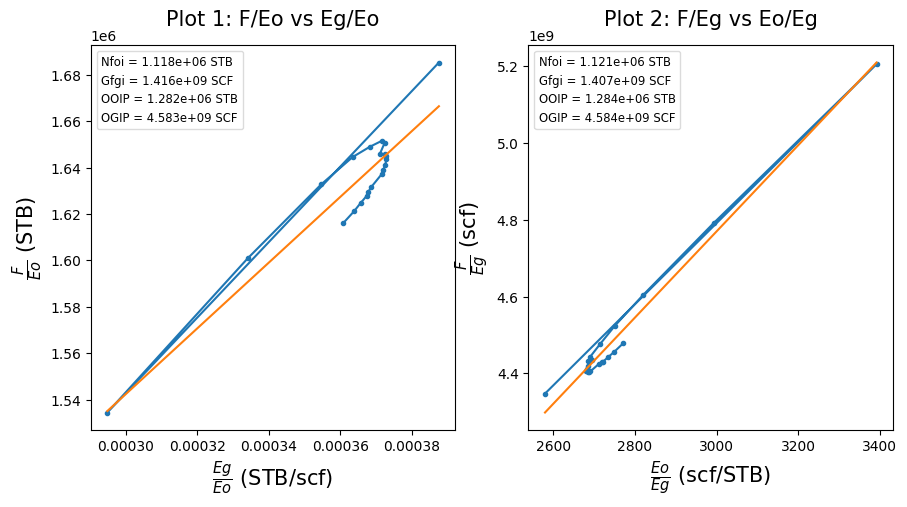

In [ ]:
# input all the required ones. Gi = 0 (no gas injection)
# variables need conversion: Bg, Gp, Np, Rv.
p = df['p'].values
Bo = df['Bo'].values
Bg = df['Bg'].values * (1 / 1E+3) # convert RB/MSCF to RB/SCF
Rv = df['Rv'].values * (1 / 1E+6) # convert STB/MMSCF to STB/SCF
Rs = df['Rs'].values
Np = df['Np'].values / 100
Gp = df['Gp'].values / 100
Gi = np.zeros(len(df))
cf = 0
cw = 0
swi = 0.2

# calculate parameters for plotting: use function "calculate_params"
x = oil()
F, Bto, Btg, Efw, Eo, Eg = x.calculate_params(p, Bo, Bg, Rv, Rs, Np, Gp, Gi, cf, cw, swi)

# create MBAL plots and automatically give in place results
x.plot('saturated', F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, figsize=(16,5))


## 4f Well-test simulation

In [ ]:
sys.path.append('/content/pyreservoir/welltest')
from wellflo import *

We want to model how the pressure transient response of a well is if we conduct a series of rate-changing test (or we call as: multirate test). The following is the series of rate we want to model.

|Hours|Rate (STB/D)|
|:--:|:--:|
|$$0 < t \leq 10$$|1,000|
|$$10 < t \leq 20$$|2,000|
|$$20 < t \leq 30$$|3,000|
|$$30 < t \leq 45$$|1,500|
|$$45 < t \leq 65$$|0|
|$$65 < t \leq 70$$|1,000|

Reservoir rock and fluid properties:
* Reservoir initial pressure 2,500 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 600 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 32 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 3,000 ft
* Oil FVF 1.33 RB/STB

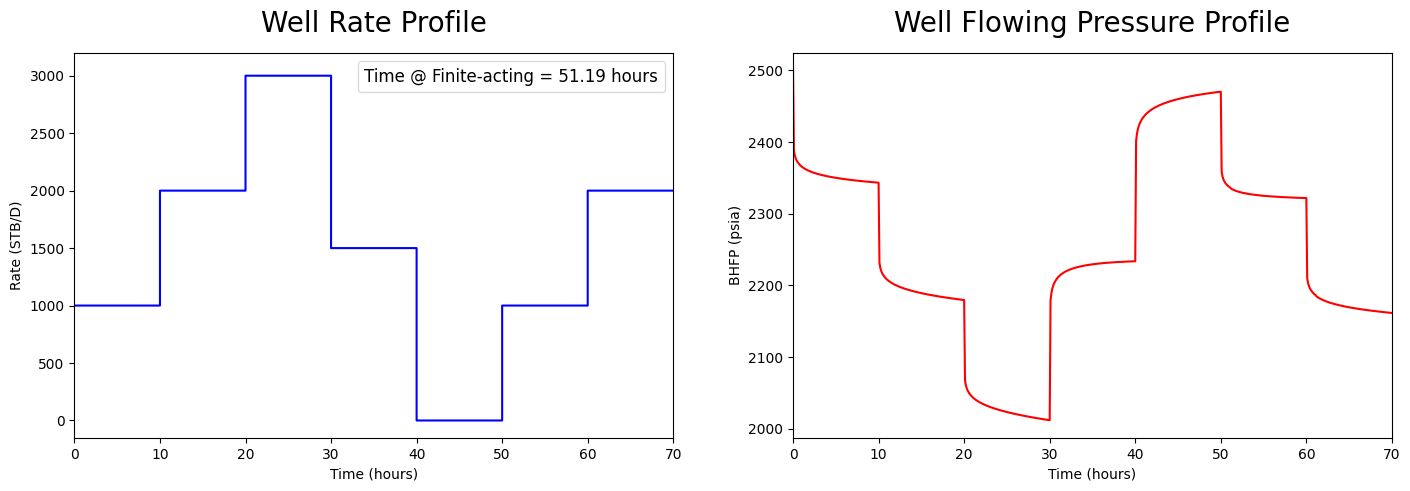

In [ ]:
# MULTIRATE
# Input our data
time = [10, 20, 30, 40, 50, 60, 70]
rate = [1000, 2000, 3000, 1500, 0, 1000, 2000]

# Inputs
poro = 0.15 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 600 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

# Wellbore
rw = 4 # inch
rw = rw * 0.083 # convert in to ft

# Stepsize
t_step = 0.1 # hour

# Run calculation simulation
simulate_multirate_test(p_initial, t_step, time, rate,
                        re, rw, perm, poro, mu, ct, Bo, h)

Now, change the porosity, permeability, compressibility, viscosity, reservoir size, and oil FVF. See their effects on the finite-acting time and the pressure transient profile. Make the following cell your playground!

Finite-acting time is 273.038 hours


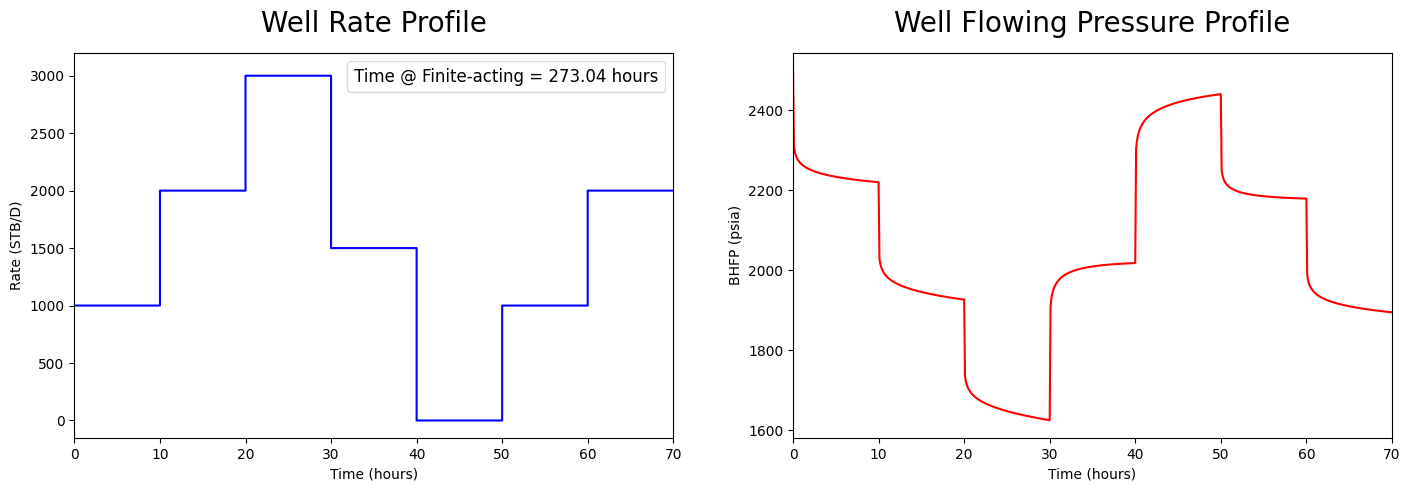

In [ ]:
# Inputs
poro = 0.4 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 300 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.33 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

# specify time step
t_step = 0.1

simulate_multirate_test(p_initial, t_step, time, rate,
                        re, rw, perm, poro, mu, ct, Bo, h)

We want to model how the rate transient response of a well is if we conduct a series of pressure-changing test (or we call as: multiple pressure test). The following is the series of rate we want to model.

|Hours|BHFP (psia)|
|:--:|:--:|
|$$0 < t \leq 20$$|1,500|
|$$10 < t \leq 40$$|1,200|
|$$20 < t \leq 60$$|1,000|
|$$30 < t \leq 80$$|1,400|
|$$45 < t \leq 100$$|1,600|
|$$65 < t \leq 120$$|1,000|

We use the same property as before. Reservoir rock and fluid properties:
* Reservoir initial pressure 2,500 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 600 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 32 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 3,000 ft
* Oil FVF 1.33 RB/STB

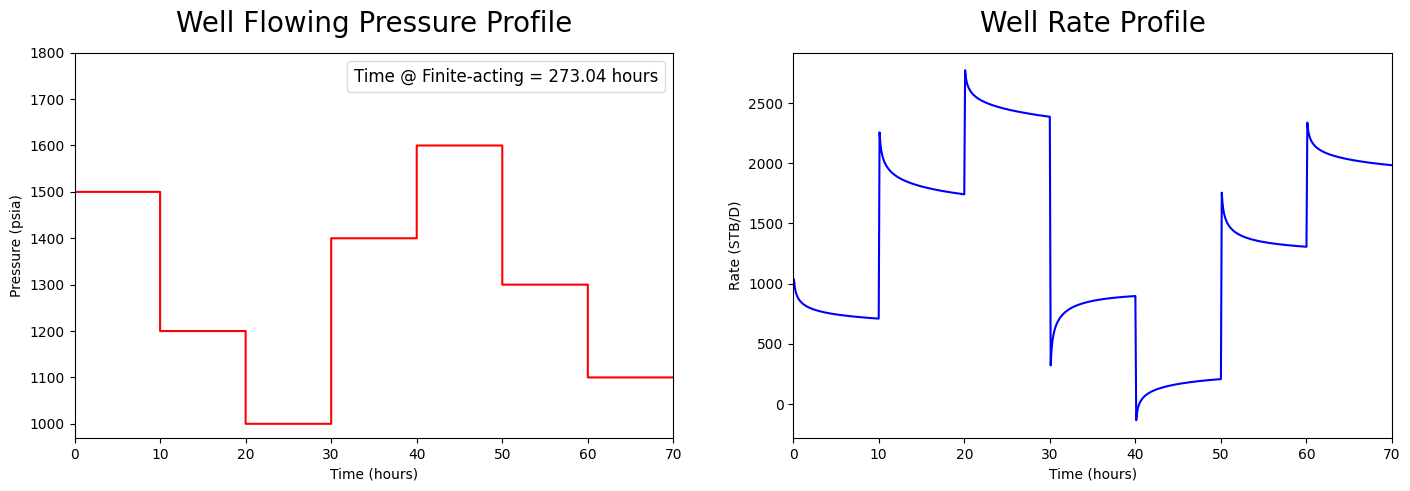

In [ ]:
# MULTIPLE PRESSURE TEST
time = [10, 20, 30, 40, 50, 60, 70]
pres = [1500, 1200, 1000, 1400, 1600, 1300, 1100]

p_initial = 1700
re = 3000

# Simulate
simulate_multipressure_test(p_initial, t_step, time, pres, re,
                            rw, perm, poro, mu, ct, Bo, h)

In [ ]:
def time_finite_acting(perm, poro, mu, ct, rw, re):
  """Calculate time at flow starts behaving infinite-acting"""
  r_D = re / rw
  t_Dw = 0.25 * r_D**2
  return (poro * mu * ct * (rw**2) * t_Dw) / (.0002637 * perm)

In [ ]:
time_finite_acting(perm, poro, mu, ct, rw, re)

273.03754266211604

In [ ]:
help(simulate_multirate_test)

Help on function simulate_multirate_test in module wellflo:

simulate_multirate_test(p_initial, t_step, t_change, q_change, re, rw, perm, poro, mu, ct, Bo, h)
    Simulate the Multiple Constant Rate Test Started from 0th Hour 
    Based on Superposition Principle



## BONUS - Well test analysis

BHP data has been prepared for you, that contains a pressure drawdown from the beginning of test to hour 46, followed by a pressure buildup from hour 46 to hour 70.

|Hours|Rate (STB/D)|
|:--:|:--:|
|$$0<t<46$$|1,000|
|$$46<t<70$$|0|

The reservoir has properties as listed below:
* 15% porosity
* Wellbore radius 0.333 ft
* Reservoir thickness 32 ft
* 12 microsip of total compressibility
* Reservoir initial pressure 3,500 psia (an estimate)
* 2 cp oil viscosity
* 1.33 RB/STB oil FVF

In [ ]:
# read BHP data for well-test analysis
bhp = pd.read_csv('/content/pyreservoir/data/welltest/drawdown+buildup.csv')

bhp

,t,p
0,0.000,2500.0
1,0.100,2388.3
2,0.200,2381.5
3,0.300,2377.5
4,0.400,2374.7
...,...,...
90,66.307,5834.0
91,67.323,5834.9
92,68.364,5835.8
93,69.430,5836.7


Plot the BHP data and give colors to separate drawdown and buildup.

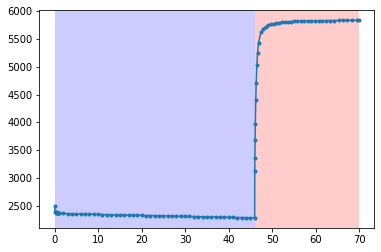

In [ ]:
# plot the BHP data and divide where to analyse drawdown and buildup
t = bhp['t'].values
p = bhp['p'].values

plt.plot(t, p, '.-')
plt.axvspan(min(t), 46, facecolor='blue', alpha=0.2)
plt.axvspan(46, max(t), facecolor='red', alpha=0.2)
plt.show()

Now, let's separate the dataframe, each for drawdown and buildup analysis. We will use mask (remember our session 3)

In [ ]:
# create mask for drawdown (<=46 hours) and buildup (>=46 hours)
mask_draw = bhp['t'] <= 46
mask_build = bhp['t'] >= 46

draw = bhp[mask_draw]
build = bhp[mask_build]

build.head(10)

,t,p
55,46.000,2278.4
56,46.020,3129.2
57,46.050,3357.5
58,46.100,3688.0
59,46.150,3967.0
60,46.250,4403.9
61,46.348,4712.3
62,46.500,5039.8
63,46.650,5244.3
64,46.880,5431.2


### Drawdown analysis

We will do analysis of pressure drawdown from hour 0 to hour 46. We'll use function `constant_rate_drawdown_test`.

In [ ]:
# see help
help(constant_rate_drawdown_test)

Help on function constant_rate_drawdown_test in module wellanalysis:

constant_rate_drawdown_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, pi, your_guess=5)
    Analyzing Constant-Rate Well-test Result
    Note: Make your initial guess of the data index where LTR and MTR separate



List down all inputs.

In [ ]:
# list down all inputs

## time, rate, and pressure data
t_draw = draw['t'].values
p_draw = draw['p'].values
q = 1000 # STB/D

## reservoir properties
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
ct = 12E-06 # Total compressibility, sip
pi = 3500 # Initial reservoir pressure, psia
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB

Do the drawdown analysis. Pass without `your_guess` first.

/content/pyreservoir/welltest/wellanalysis.py:94: RuntimeWarning: divide by zero encountered in log
  y_fit = m1 * np.log(t) + c1


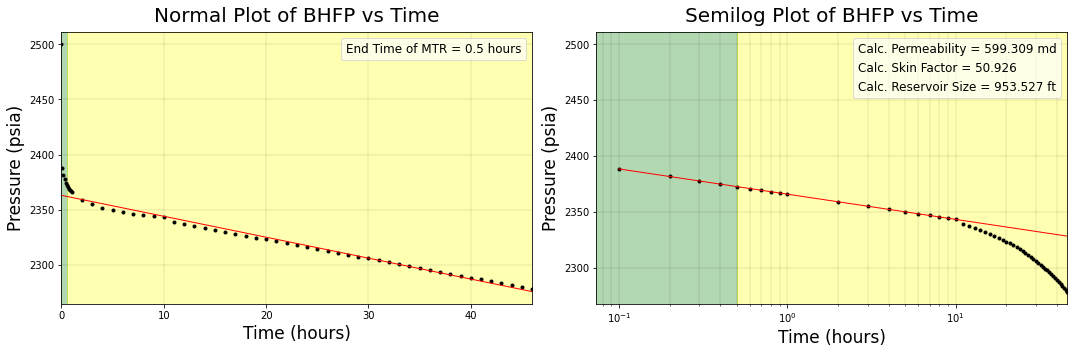

In [ ]:
# well-test analysis
constant_rate_drawdown_test(t_draw, p_draw, q, Bo, mu_oil, h, poro, ct, rw, pi)

It should look that MTR and LTR are not separated enough rightly. Now define yourselves where to separate it. Use `your_guess` and adjust it.  

/content/pyreservoir/welltest/wellanalysis.py:94: RuntimeWarning: divide by zero encountered in log
  y_fit = m1 * np.log(t) + c1


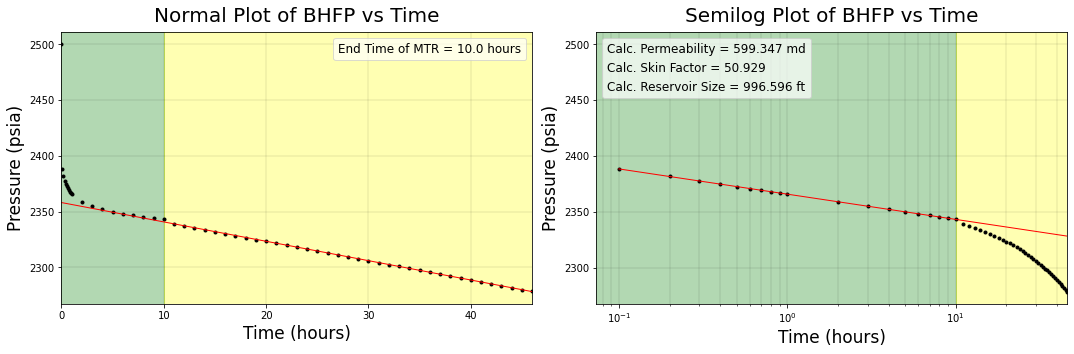

In [ ]:
# well-test analysis, use "your_guess"
constant_rate_drawdown_test(t_draw, p_draw, q, Bo, mu_oil, h, poro, ct, rw, pi, your_guess=19)

### Buildup analysis

For the buildup analysis, we analyze the portion of BHP data from hour 46 to hour 70. The reservoir is still the same. We'll use function `constant_rate_buildup_test`.

In [ ]:
# see help
help(constant_rate_buildup_test)

Help on function constant_rate_buildup_test in module wellanalysis:

constant_rate_buildup_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, t_since_shutin, your_guess=5)
    Analyzing Constant Rate Buildup Well-test Result



List down all inputs. The reservoir properties have been defined before. We add here `t_since_shutin` as how long the test continues (since hour 0) before flow stopped. It was hour 46.

In [ ]:
# list down all inputs

## define time, rate, and pressure
t_build = build['t'].values
p_build = build['p'].values
q = 1000 # STB/D

## define flow stopping time
t_since_shutin = 46

Now do the buildup analysis. Just like before we first use it without passing `your_guess`.

/content/pyreservoir/welltest/wellanalysis.py:319: RuntimeWarning: divide by zero encountered in true_divide
  x = (t_since_shutin + delta_t) / delta_t


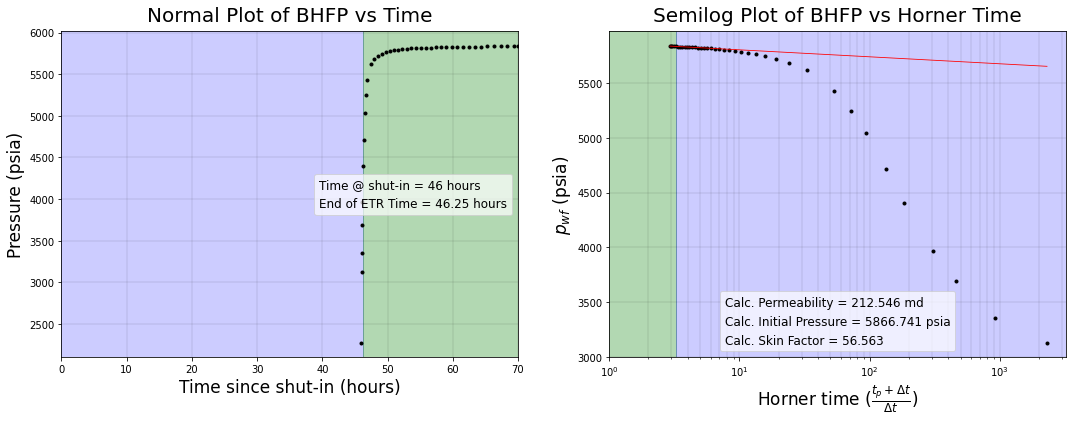

In [ ]:
# well-test analysis
constant_rate_buildup_test(t_build, p_build, q, Bo, mu_oil, h, poro,
                           ct, rw, t_since_shutin)

It should look that ETR and MTR are not separated enough rightly. Now define yourselves where to separate it. Use `your_guess` and adjust it.  

/content/pyreservoir/welltest/wellanalysis.py:319: RuntimeWarning: divide by zero encountered in true_divide
  x = (t_since_shutin + delta_t) / delta_t


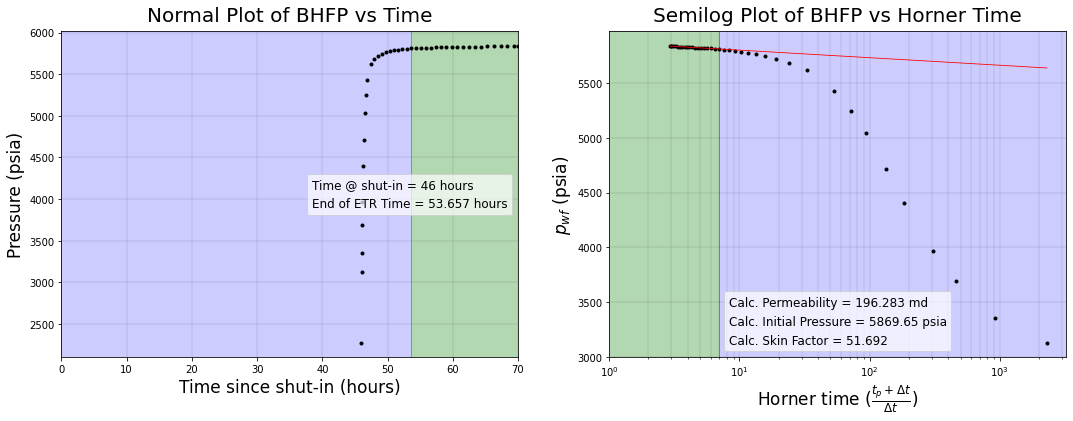

In [ ]:
# well-test analysis. Pass "your_guess"
constant_rate_buildup_test(t_build, p_build, q, Bo, mu_oil, h, poro,
                           ct, rw, t_since_shutin, your_guess=20)